In [1]:
import os, sys
prosrs_dir = os.path.dirname(os.getcwd())   # directory that contains prosrs module
sys.path.insert(0, prosrs_dir) # add to PYTHONPATH
import prosrs

In [2]:
func = 'Goldstein' # Goldstein-Price function
prob = prosrs.benchmark(func) # generate benchmark optimization problem
print(prob) # show problem

Optimization problem:
- Name: Goldstein
- Dimension: 2
- Domain: {'x1': (-2.0, 2.0), 'x2': (-2.0, 2.0)}
- Response variable: 'y'
- Random noise: Gaussian with standard deviation of 2
- Global minimum: 3
- Global minimum locations: ('x1', 'x2') = (0.0, -1.0)


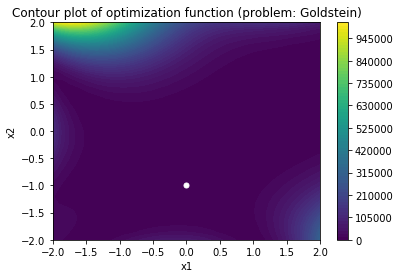

In [3]:
prob.visualize(true_func=True, n_samples=1000, plot='contour') # contour plot of underlying true function (white dot: global min)

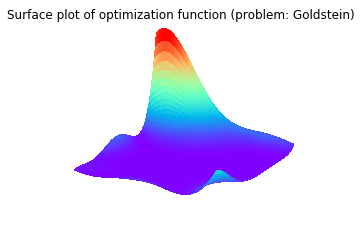

In [4]:
prob.visualize(true_func=True, n_samples=5000, plot='surface') # show surface plot of underlying true function

In [5]:
# Set up optimization
n_worker = 6 # number of workers
n_iter = 4 # number of iterations
optimizer = prosrs.Optimizer(prob, n_worker, n_iter=n_iter) # create optimizer object

In [6]:
# Check optimization configuration to make sure everything looks fine
optimizer.show(select=['config'])

Optimization configuration:
- Number of workers: 6
- Termination criterion: stop after completing 4 iterations
- Resuming from the last run?  No
- Output directory: 'out'


In [7]:
# Run optimization
optimizer.run()


Start running ProSRS algorithm ...

Iteration 1:
Proposing new points (DOE) .......... Done (time took: 1.09e-05 sec).
Evaluating proposed points .......... Done (time took: 5.30e-02 sec).
Updating optimizer state .......... Done (time took: 3.72e-04 sec).

Iteration 2:
Building RBF regression model .......... Done (time took: 2.50e-02 sec).
Proposing new points .......... Done (time took: 2.34e-03 sec).
Evaluating proposed points .......... Done (time took: 8.73e-03 sec).
Updating optimizer state .......... Done (time took: 3.16e-04 sec).

Iteration 3:
Building RBF regression model .......... Done (time took: 2.55e-02 sec).
Proposing new points .......... Done (time took: 3.23e-03 sec).
Evaluating proposed points .......... Done (time took: 7.79e-03 sec).
Updating optimizer state .......... Done (time took: 2.99e-04 sec).

Iteration 4:
Building RBF regression model .......... Done (time took: 2.61e-02 sec).
Proposing new points .......... Done (time took: 4.88e-03 sec).
Evaluating pr

In [8]:
# Get optimization results
best_point = optimizer.best_x # best point found so far
best_value = optimizer.best_y # best (noisy) value found so far
print('best point: %s' % str(best_point))
print('best value: %g' % best_value)

best point: [ 0.50482144 -0.65906083]
best value: 48.4762


In [9]:
# Now use 'show' method to display the same results
optimizer.show(select=['result']) 

Optimization result:
- Best point:
  x1 = 0.504821, x2 = -0.659061
- Best (noisy) value:
  y = 48.4762


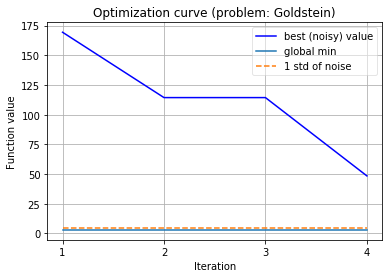

In [10]:
# Visualize optimization results
optimizer.visualize(select=['optim_curve']) # optimization curve

In [11]:
# From the optimization curve above, it looks like the optimization has not converged after 4 iterations.
# Now let's run 16 more iterations (i.e., a total of 20 iterations)
n_iter = 20
optimizer = prosrs.Optimizer(prob, n_worker, n_iter=n_iter, resume=True) # set ``resume=True`` so that we continue from the last run
optimizer.show(select=['config']) # check configuration

Optimization configuration:
- Number of workers: 6
- Termination criterion: stop after completing 20 iterations
- Resuming from the last run?  Yes
- Output directory: 'out'


In [12]:
# Everything looks good. Now let's run the algorithm.
optimizer.run()


Start running ProSRS algorithm ...

Iteration 5:
Building RBF regression model .......... Done (time took: 4.31e-02 sec).
Proposing new points .......... Done (time took: 3.80e-03 sec).
Evaluating proposed points .......... Done (time took: 8.20e-03 sec).
Updating optimizer state .......... Done (time took: 1.86e-04 sec).

Iteration 6:
Building RBF regression model .......... Done (time took: 2.50e-02 sec).
Proposing new points .......... Done (time took: 3.62e-03 sec).
Evaluating proposed points .......... Done (time took: 7.37e-03 sec).
Updating optimizer state .......... Done (time took: 2.84e-04 sec).

Iteration 7:
Building RBF regression model .......... Done (time took: 2.64e-02 sec).
Proposing new points .......... Done (time took: 3.67e-03 sec).
Evaluating proposed points .......... Done (time took: 7.45e-03 sec).
Updating optimizer state .......... Done (time took: 2.03e-04 sec).

Iteration 8:
Building RBF regression model .......... Done (time took: 2.78e-02 sec).
Proposing 

Optimization result:
- Best point:
  x1 = 0.0233015, x2 = -0.989024
- Best (noisy) value:
  y = -0.52465


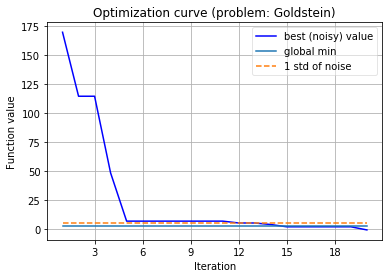

In [13]:
# Show optimization results
optimizer.show(select=['result'])
optimizer.visualize(select=['optim_curve'])

In [16]:
# Now select the true best point from all the evaluated points
n_top = 0.2 # select from top 20-percent points (i.e. from 0.2*n_iter*n_worker = 0.2*20*6 = 24 points)
n_repeat = 100 # number of Monte Carlo repeats
optimizer.posterior_eval(n_top=n_top, n_repeat=n_repeat) # run posterior Monte Carlo evaluations

Running posterior evaluations (n_point = 24, n_repeat = 100) .......... Done (time took: 1.68e-01 sec).


In [17]:
# Get optimization results after posterior evaluations
best_point = optimizer.true_best_x # true best point found (the one with the lowest Monte Carlo mean estimate)
best_value = optimizer.true_best_y # true best value found (the mean estimate for the true best point)
print('True best point: %s' % str(best_point))
print('True best value: %g' % best_value)

True best point: [-0.01775627 -1.01836472]
True best value: 2.99195


In [18]:
# Or more conveniently, display results using 'show' method
optimizer.show(select=['post_result'])

Posterior evaluation results:
- Condition: run ProSRS algorithm for 20 iterations, then run posterior evaluations with 100 Monte Carlo repeats
- True best point:
  x1 = -0.0177563, x2 = -1.01836
- True best value:
  y = 2.99195
